# Relatório de Análise VII 

## Indentificando e Removendo Outliers

In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [45]:
dados= pd.read_csv('aluguel_residencial.csv', sep= ';')

In [46]:
dados.boxplot(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

In [47]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor do m²,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [48]:
valor= dados['Valor']

In [49]:
valor

0        1700.0
1        7000.0
2         800.0
3         800.0
4        1300.0
          ...  
21821     900.0
21822     800.0
21823    1800.0
21824    1400.0
21825    3000.0
Name: Valor, Length: 21826, dtype: float64

In [50]:
Q1= valor.quantile(.25)

In [51]:
Q1

1600.0

In [52]:
Q3= valor.quantile(.75)

In [53]:
Q3

5500.0

In [54]:
IIQ = Q3 - Q1

In [55]:
IIQ

3900.0

In [56]:
limite_inferior= Q1 -1.5*IIQ

In [57]:
limite_inferior

-4250.0

In [58]:
limite_superior = Q3 + 1.5 * IIQ

In [59]:
limite_inferior

-4250.0

In [60]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

In [61]:
dados_new.boxplot(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

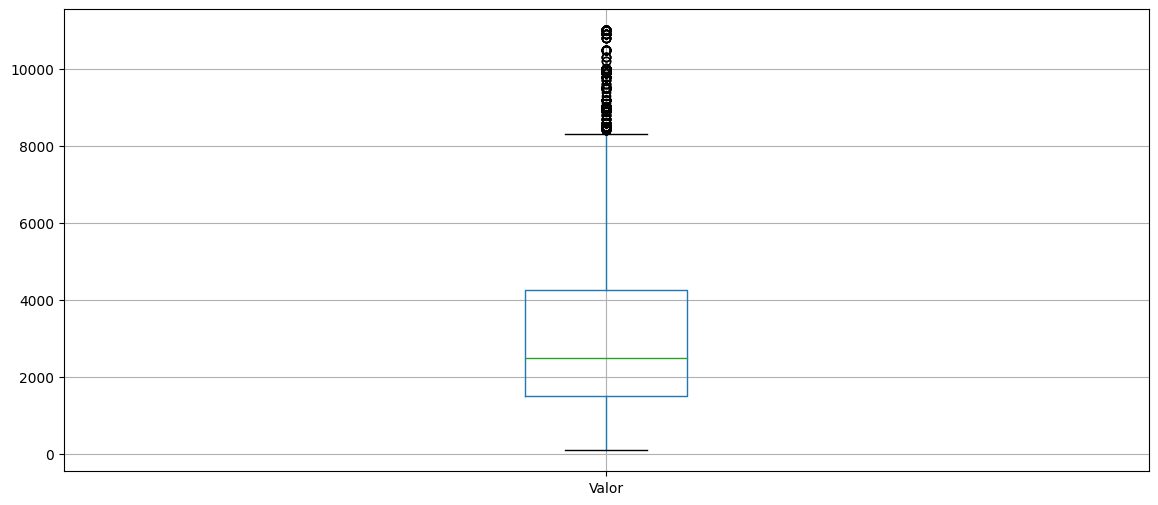

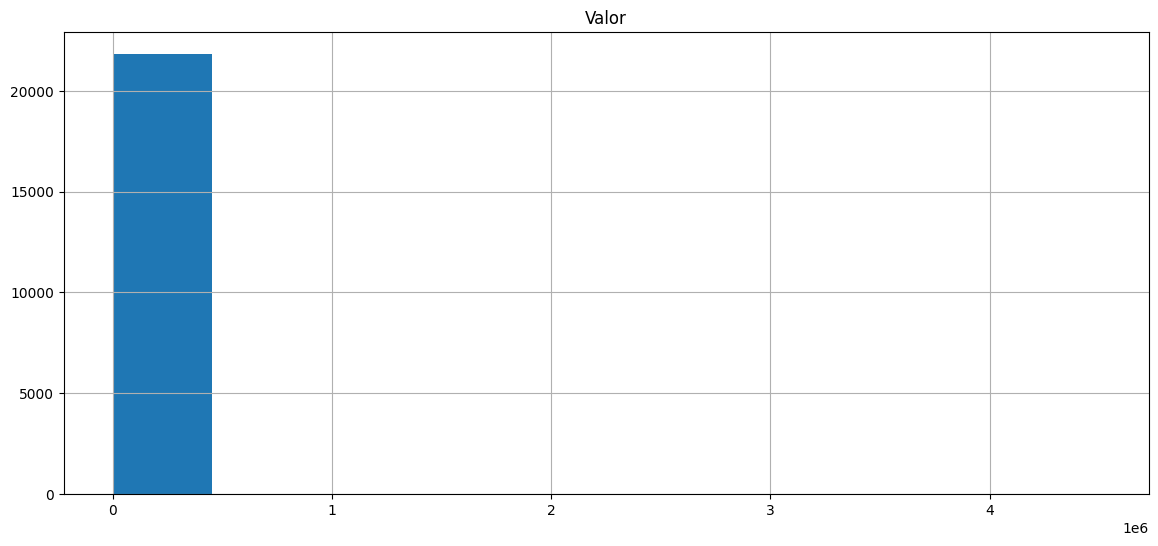

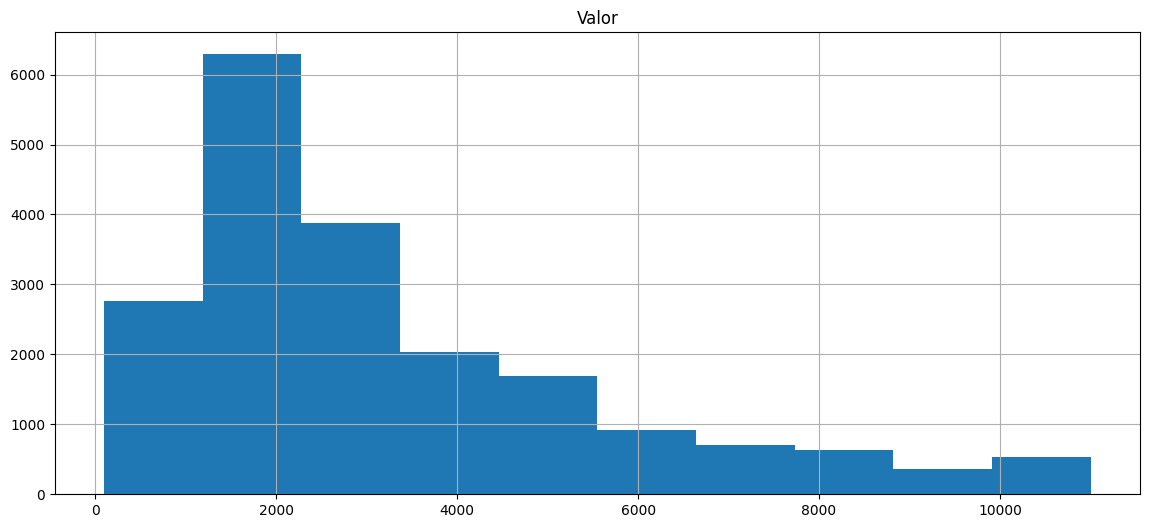

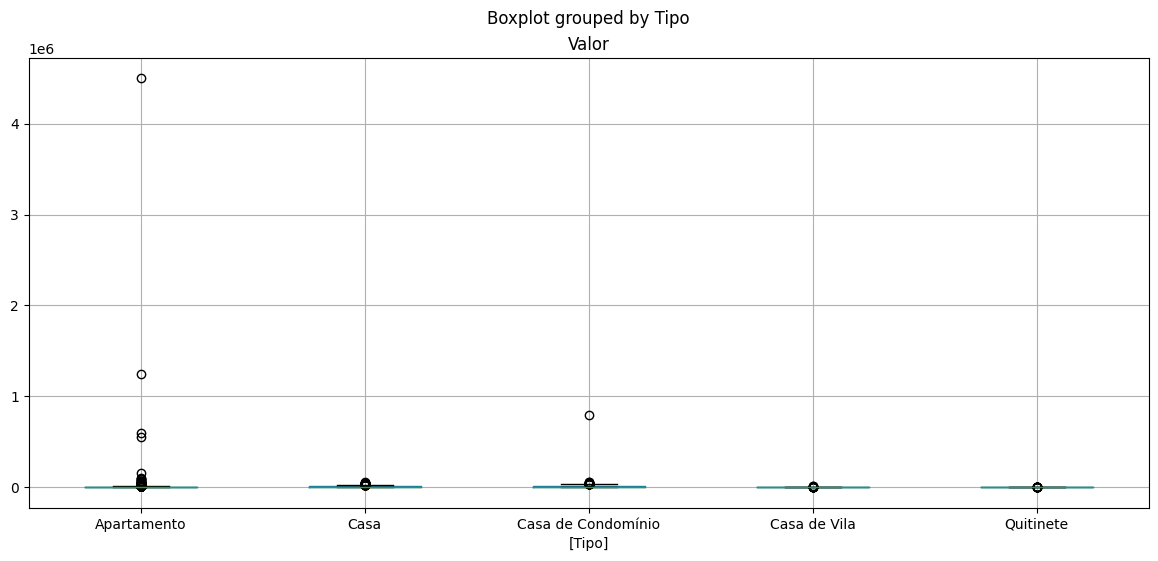

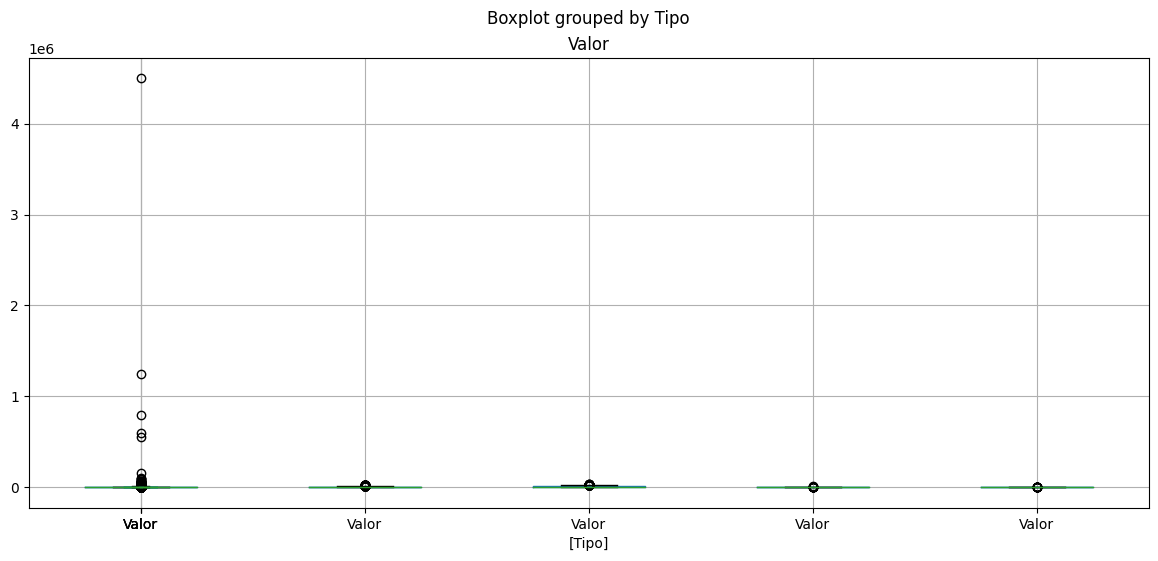

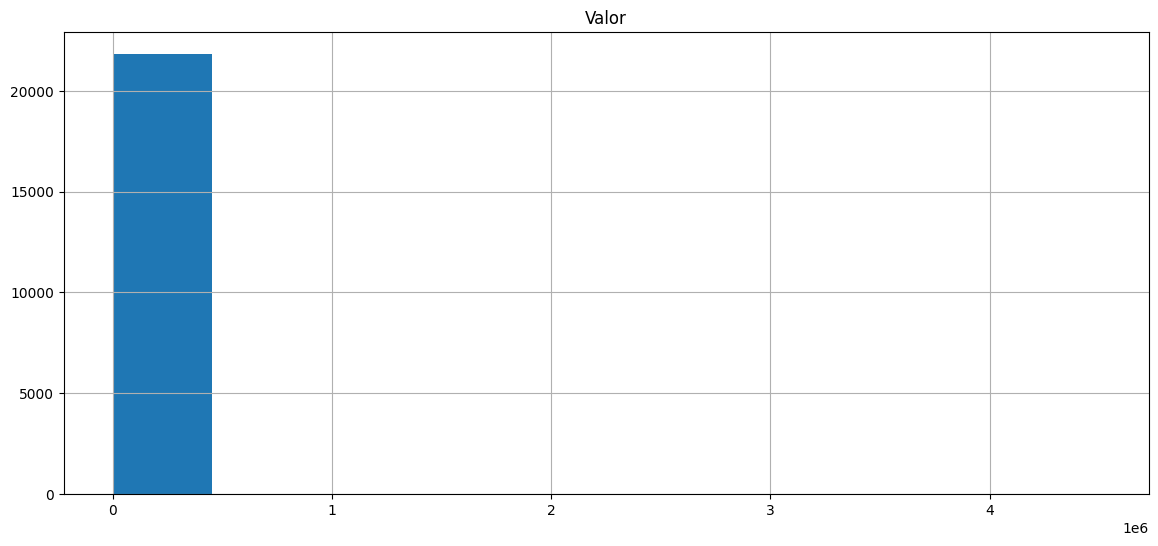

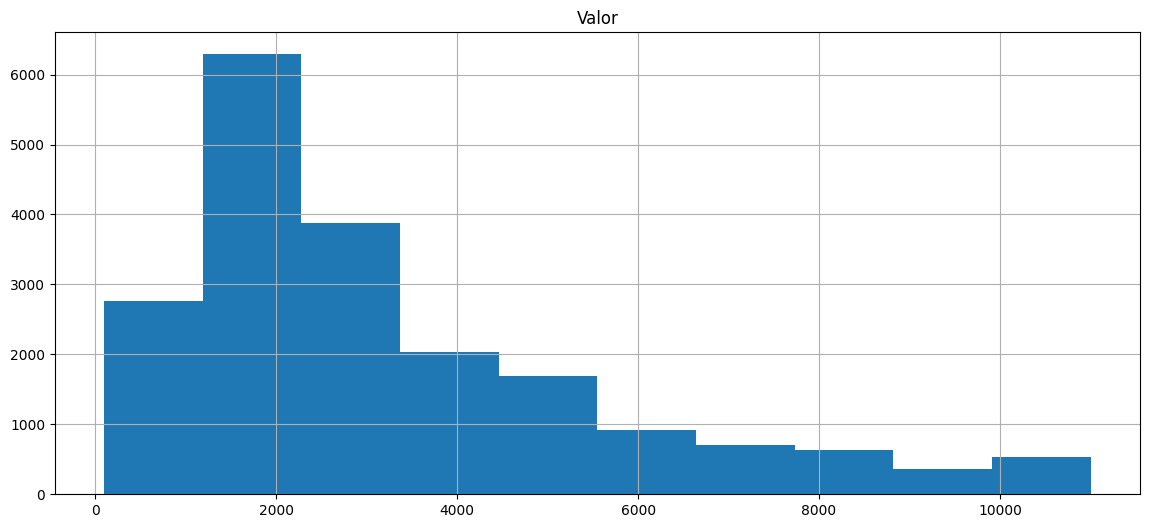

In [62]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Ouliers por Grupo

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

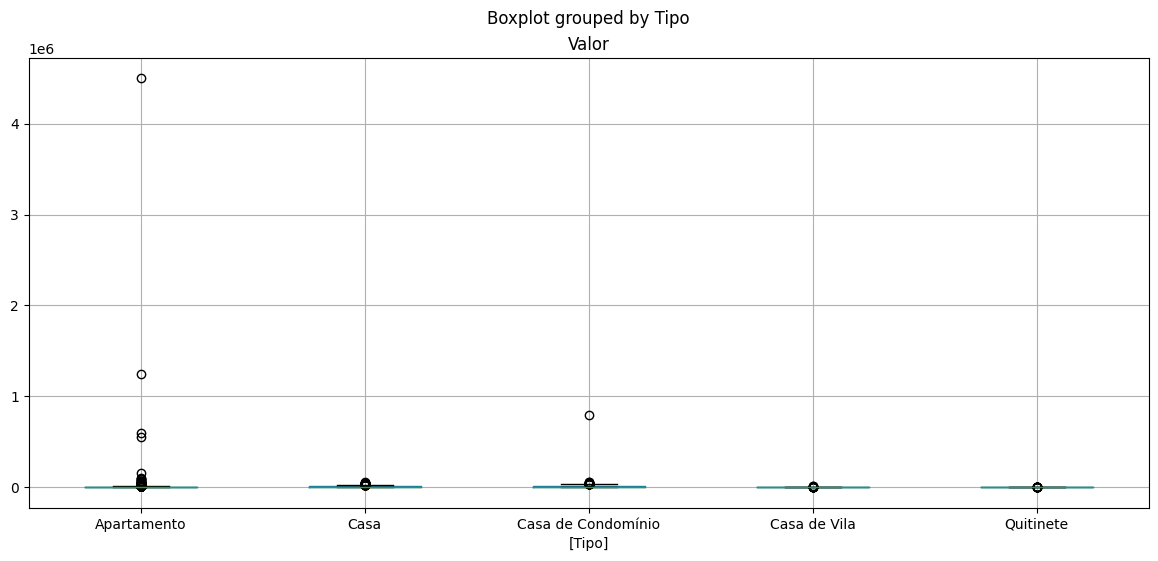

In [63]:
dados.boxplot(['Valor'],by= ['Tipo'])

In [64]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [65]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [66]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [67]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [68]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [69]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [70]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [71]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [72]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [73]:
limite_superior['Apartamento']

9950.0

In [74]:
ddos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo])&(dados['Valor'] <= limite_superior[tipo])
    selecao= eh_tipo & eh_dentro_limite
    dados_selecao=dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])


<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

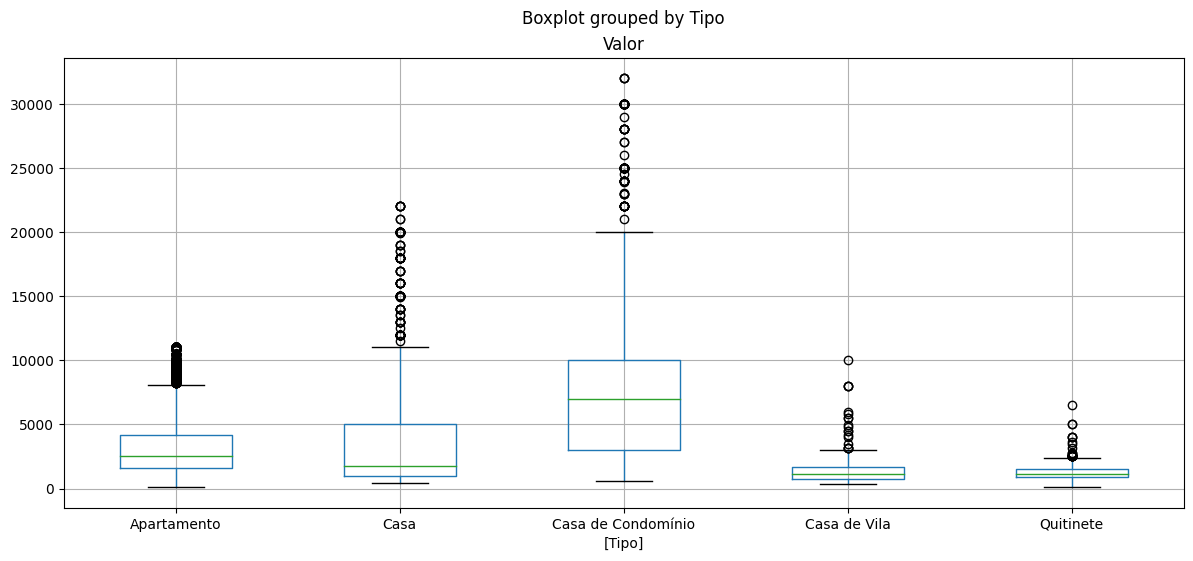

In [75]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [76]:
dados_new.to_csv('aluguel_residencial_sem_outlies.csv', sep=';', index= False)